In [9]:
#Getting directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
print("parentdir"+" is "+ parentdir)
directory=r"D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S101d14Feb17_60.5_635_A2_CuAzu655";#data directory
print("directory" + " is " + directory)

parentdir is D:\Research\Reports and Presentation\reports\azurin_single-molecule\Analysis
directory is D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S101d14Feb17_60.5_635_A2_CuAzu655


In [10]:
#Import modules
import os.path
import glob
import os
import re
from xlwt import Workbook

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from numpy import sqrt, pi, exp, linspace, loadtxt

from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.chdir(parentdir)
!python analysis_version_6.py
%run analysis_version_6.py

The file Point_A2_035mV(20)_60.5__30s_19.pt3.datn.em.plot does not exist
Fit ON time histogram: 57.6721558574 * e^{-29.5821405293 t}
Fit OFF time histogram: 1.62464566003 * e^{-0.863630282854 t} - -17.9508325022 * e^{-11.9671958723 t}


()

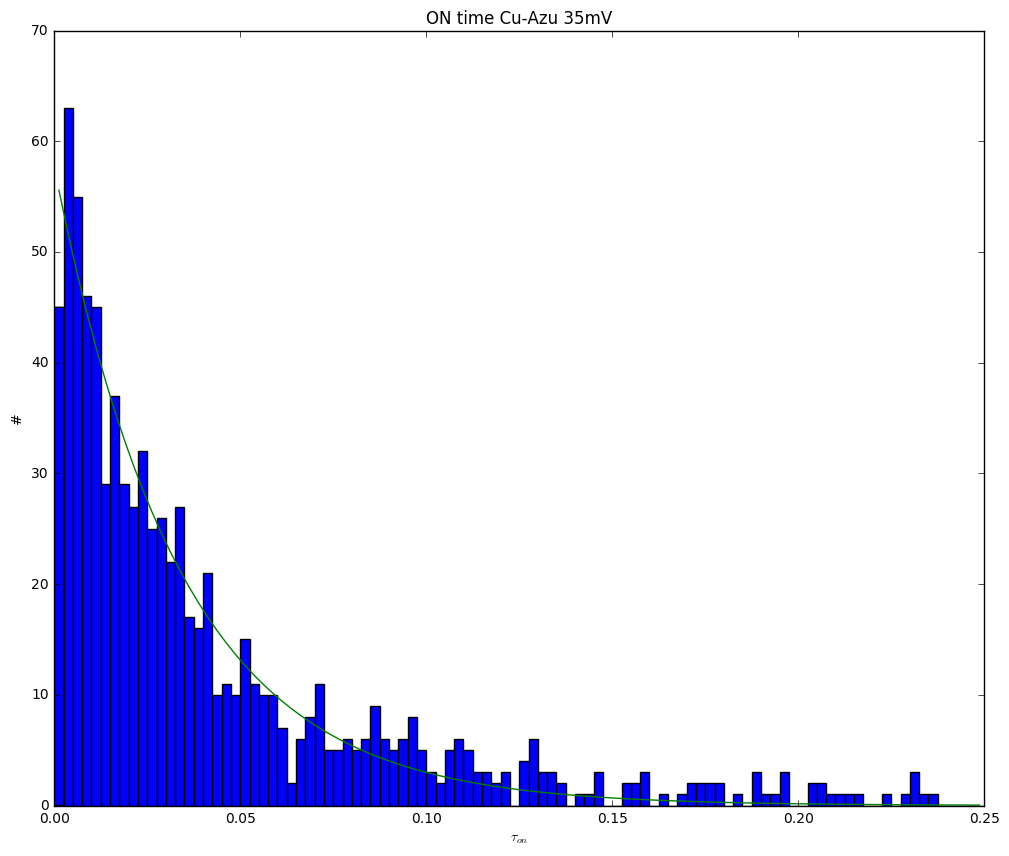

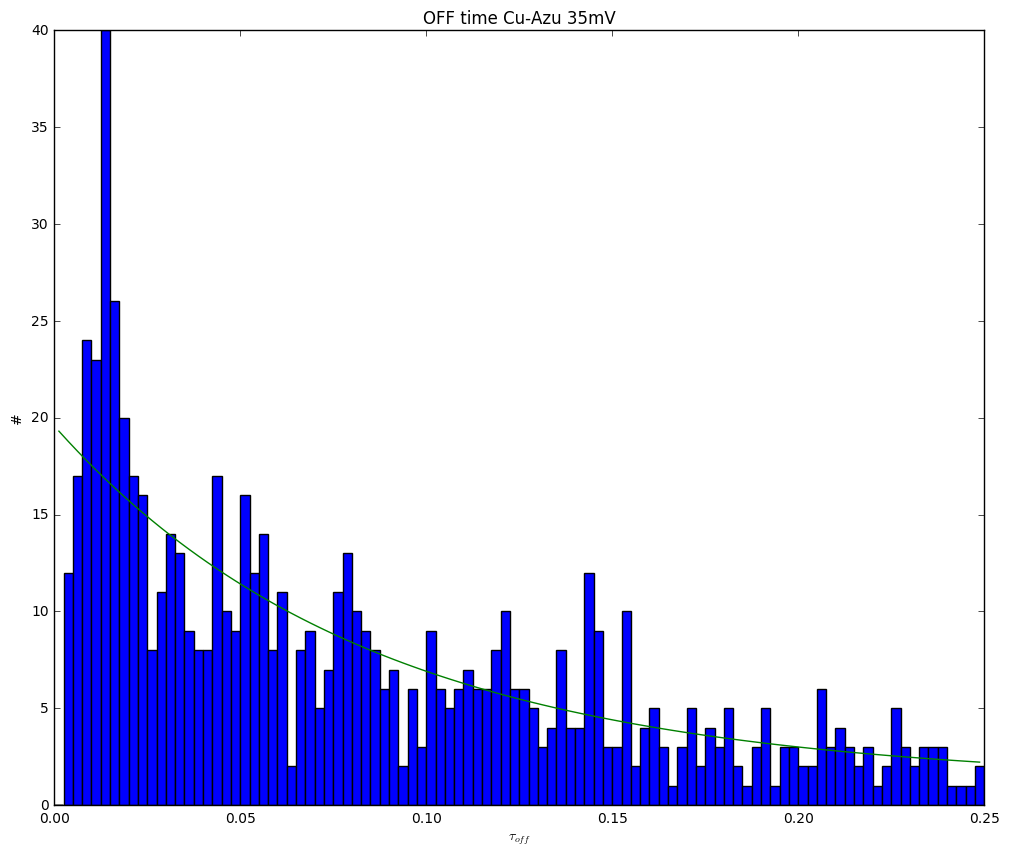

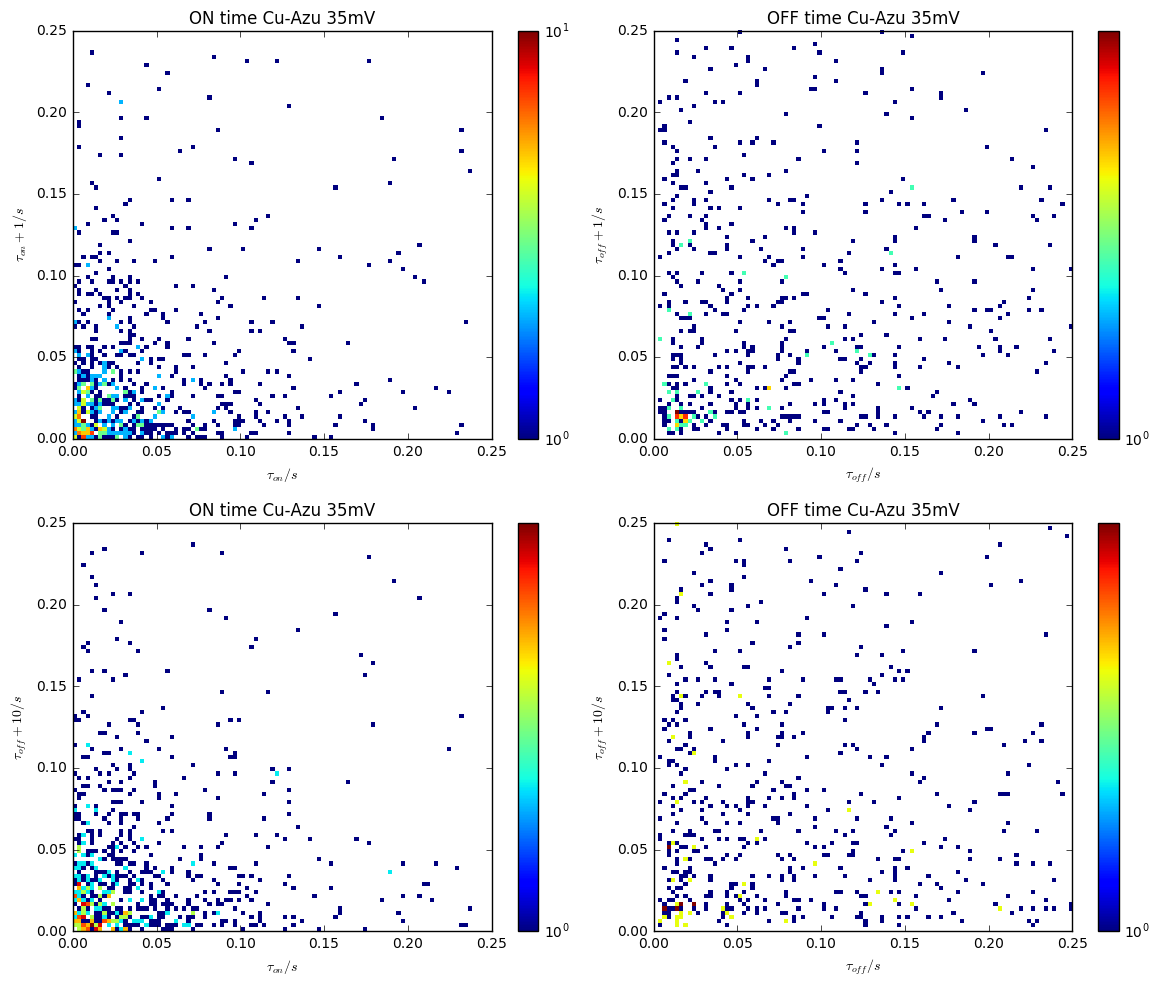

In [4]:
#*************Analysis for a specific potential********************

titel = 'average_on_and_off_time_specific_mV_Cu.xls' #name excell output file
pointnumbers = 31 #Change this to the minimal amount of points
pot = 18 #number of potentials
specific_potential = 35 #the specific potential you want the plots for
onMax=0.25;offMax=0.25;
rnge_on = [[0,onMax], [0,onMax]] #range on histograms, form: [[0,0.25], [0,0.25]] --> [xrange], [yrange]
rnge_off = [[0,offMax], [0,offMax]] #range off histograms
bins_on = 100  #bins for the on histograms
bins_off = 100 #bins for the off histograms
proteins = 'Cu' #change this to 'Zn' or 'Cu' depending on which files you are analysing. Changes title of plots.
current_dir = directory#'S101d14Feb17_60.5_635_A2_CuAzu655' #foldername you want to work in.
max_his_on = onMax
max_his_off = offMax
x_shift = 10 # t vs  t + x_shift 

histograms(titel, pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off, proteins, current_dir, max_his_on, max_his_off, x_shift)

## Individual Molecules

In [6]:
os.chdir(parentdir)
!python analysis_version_9.py
%run analysis_version_9.py

()

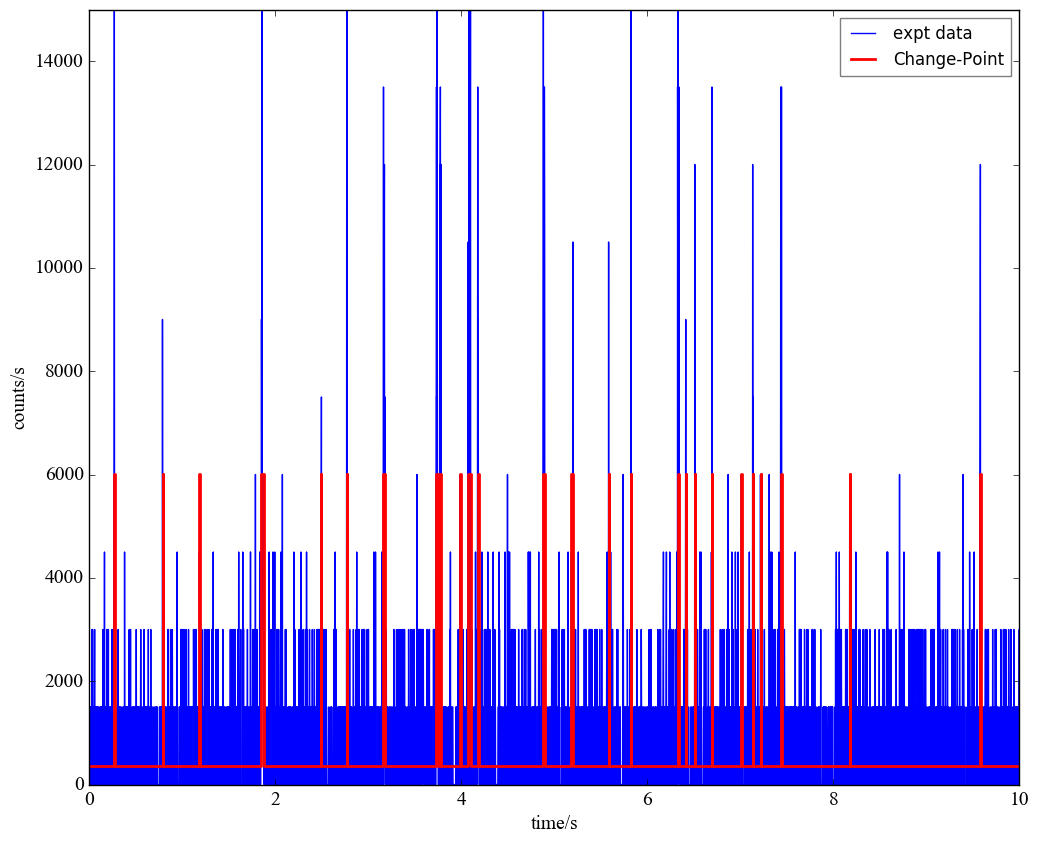

In [10]:
#************* data and changepoint plot********************
os.chdir(directory);os.chdir("Point_A2_60.5__30s_1/")
file1 = 'Point_A2_100mV(8)_60.5__30s_1.pt3.datn'
file2 = 'Point_A2_100mV(8)_60.5__30s_1.pt3.datn.em.plot'
x_lim_min = 0;
x_lim_max = 10;
binpts=15000;
y_lim_min = 0;
y_lim_max = 15000;


time_trace_plot(file1, file2, x_lim_min, x_lim_max, y_lim_min, y_lim_max,binpts)

The file Point_A2_090mV(18)_60.5__30s_11.pt3.datn.em.plot does not exist
The file Point_A2_040mV(17)_60.5__30s_16.pt3.datn.em.plot does not exist
The file Point_A2_035mV(20)_60.5__30s_19.pt3.datn.em.plot does not exist


()

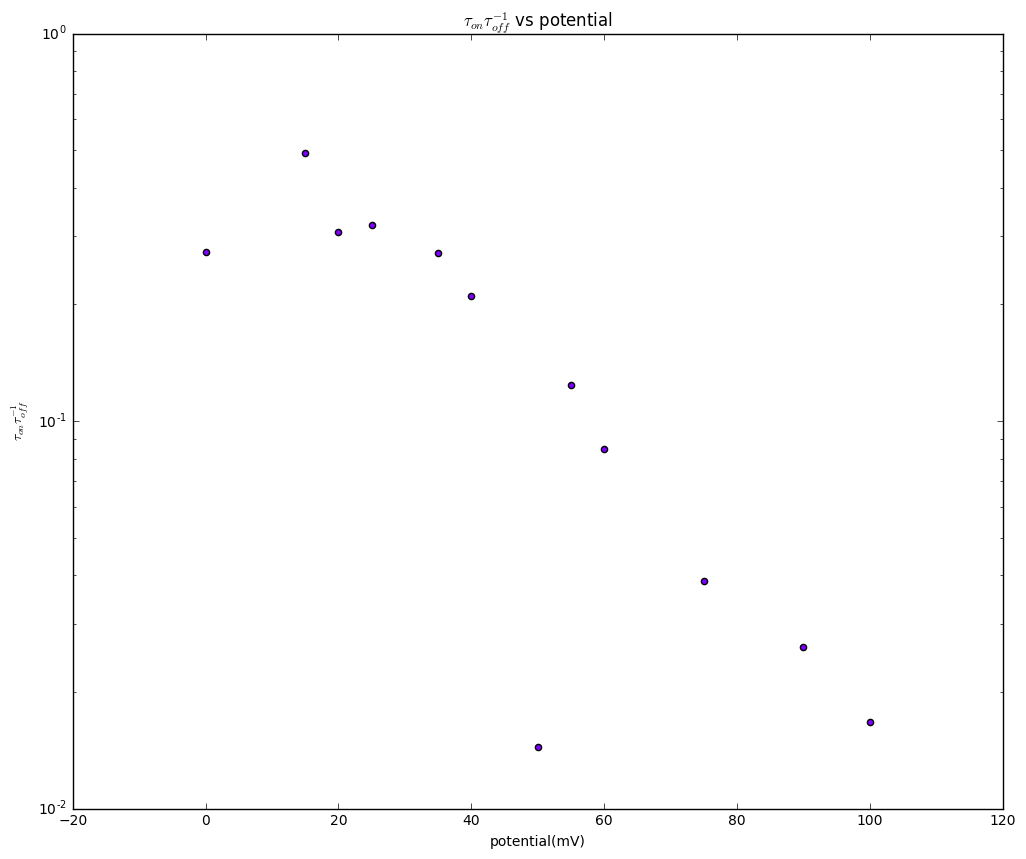

In [13]:
#************* t_on t_off^(-1) vs potential********************

pointnumbers = 31 #Change this to the minimal amount of points
pot = 16 #number of potentials
current_dir = directory #foldername you want to work in.
protein_amount = 1 #number of proteins you want to be plotted (will plot the first x proteins)
t_ratio(pot, pointnumbers, current_dir, protein_amount)

The file Point_A2_090mV(18)_60.5__30s_11.pt3.datn.em.plot does not exist
The file Point_A2_040mV(17)_60.5__30s_16.pt3.datn.em.plot does not exist
The file Point_A2_035mV(20)_60.5__30s_19.pt3.datn.em.plot does not exist


()

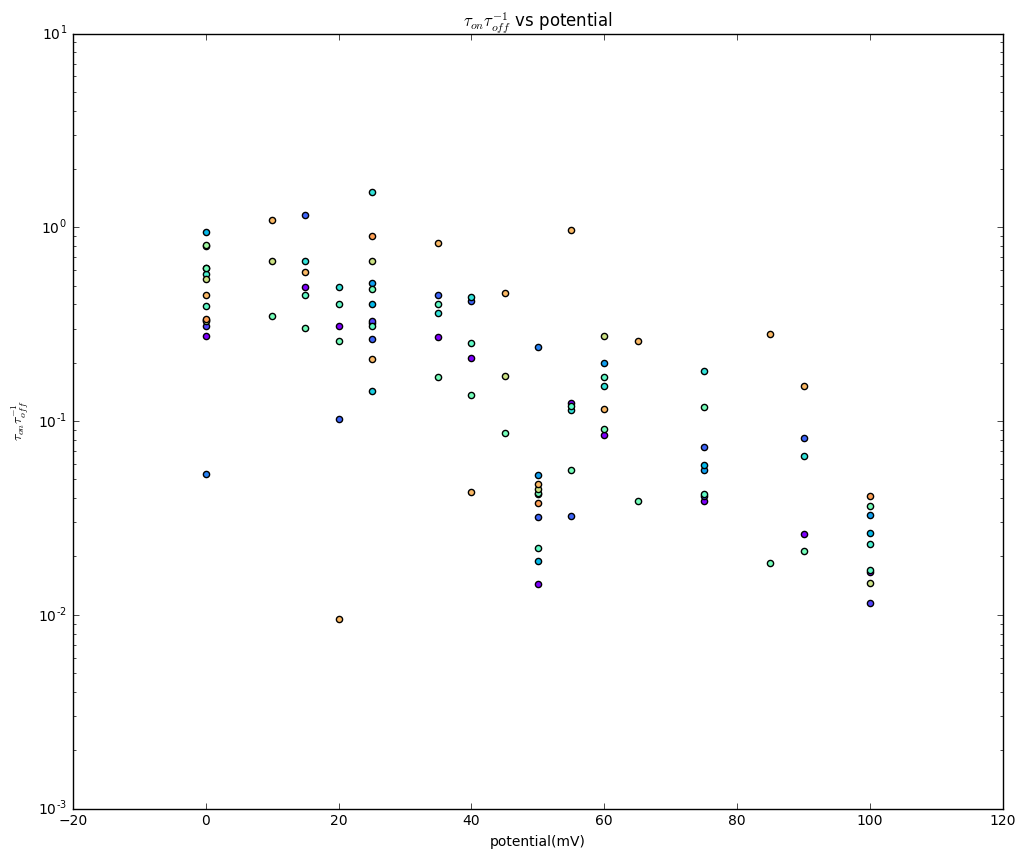

In [11]:
#************* t_on t_off^(-1) vs potential********************

pointnumbers = 31 #Change this to the minimal amount of points
pot = 16 #number of potentials
current_dir = directory #foldername you want to work in.
protein_amount = 24 #number of proteins you want to be plotted (will plot the first x proteins)
t_ratio(pot, pointnumbers, current_dir, protein_amount)